In [1]:
import cv2
import matplotlib.pyplot as plt
import sys
import numpy as np
sys.path.append('..')
from stars import BH_stars_img
from telescope_simulator import TelescopeSimulator

In [2]:
stellars_color = cv2.imread('original.png', 1)
stellars_color = cv2.cvtColor(stellars_color, cv2.COLOR_BGR2RGB)
stellars_gray = cv2.imread('original.png', 0)

In [3]:
stellars_gray.shape

(1190, 2210)

In [4]:
image_size = 595
# Calculate the number of rows and columns for the small pieces
num_rows = stellars_gray.shape[0] // image_size
num_cols = stellars_gray.shape[1] // image_size

# Create an empty list to store the small pieces
small_pieces = []

# Iterate over the rows and columns
for row in range(num_rows):
    for col in range(num_cols):
        # Calculate the start and end indices for each small piece
        start_row = row * image_size
        end_row = start_row + image_size
        start_col = col * image_size
        end_col = start_col + image_size
        
        # Extract the small piece from the original image
        small_piece = stellars_gray[start_row:end_row, start_col:end_col]
        
        # Append the small piece to the list
        small_pieces.append(small_piece)

# If the image size is not divisible by the desired size, fill the remaining part with black
if stellars_gray.shape[0] % image_size != 0:
    remaining_rows = stellars_gray.shape[0] % image_size
    for col in range(num_cols):
        start_row = num_rows * image_size
        end_row = start_row + remaining_rows
        start_col = col * image_size
        end_col = start_col + image_size
        small_piece = np.zeros((remaining_rows, image_size), dtype=np.uint8)
        small_piece[:end_row-start_row, :] = stellars_gray[start_row:end_row, start_col:end_col]
        small_pieces.append(small_piece)

if stellars_gray.shape[1] % image_size != 0:
    remaining_cols = stellars_gray.shape[1] % image_size
    for row in range(num_rows):
        start_row = row * image_size
        end_row = start_row + image_size
        start_col = num_cols * image_size
        end_col = start_col + remaining_cols
        small_piece = np.zeros((image_size, image_size), dtype=np.uint8)
        small_piece[:, :end_col-start_col] = stellars_gray[start_row:end_row, start_col:end_col]
        small_pieces.append(small_piece)

# Fill the remaining part with black to make it (612, 612)
if stellars_gray.shape[0] % image_size != 0:
    remaining_rows = image_size - stellars_gray.shape[0] % image_size
    for col in range(num_cols):
        start_row = num_rows * image_size
        end_row = start_row + remaining_rows
        start_col = col * image_size
        end_col = start_col + image_size
        small_piece = np.zeros((image_size, image_size), dtype=np.uint8)
        small_pieces.append(small_piece)


# Print the number of small pieces created
print(f"Number of small pieces: {len(small_pieces)}")

Number of small pieces: 8


In [5]:
# Create an empty list to store the small color pieces
small_color_pieces = []

# Iterate over the rows and columns
for row in range(num_rows):
    for col in range(num_cols):
        # Calculate the start and end indices for each small piece
        start_row = row * image_size
        end_row = start_row + image_size
        start_col = col * image_size
        end_col = start_col + image_size
        
        # Extract the small color piece from the original image
        small_color_piece = stellars_color[start_row:end_row, start_col:end_col]
        
        # Append the small color piece to the list
        small_color_pieces.append(small_color_piece)

# If the image size is not divisible by the desired size, fill the remaining part with black
if stellars_color.shape[0] % image_size != 0:
    remaining_rows = stellars_color.shape[0] % image_size
    for col in range(num_cols):
        start_row = num_rows * image_size
        end_row = start_row + remaining_rows
        start_col = col * image_size
        end_col = start_col + image_size
        small_color_piece = np.zeros((remaining_rows, image_size, 3), dtype=np.uint8)
        small_color_piece[:end_row-start_row, :, :] = stellars_color[start_row:end_row, start_col:end_col, :]
        small_color_pieces.append(small_color_piece)

if stellars_color.shape[1] % image_size != 0:
    remaining_cols = stellars_color.shape[1] % image_size
    for row in range(num_rows):
        start_row = row * image_size
        end_row = start_row + image_size
        start_col = num_cols * image_size
        end_col = start_col + remaining_cols
        small_color_piece = np.zeros((image_size, image_size, 3), dtype=np.uint8)
        small_color_piece[:, :end_col-start_col, :] = stellars_color[start_row:end_row, start_col:end_col, :]
        small_color_pieces.append(small_color_piece)

# Fill the remaining part with black to make it (612, 612)
if stellars_color.shape[0] % image_size != 0:
    remaining_rows = image_size - stellars_color.shape[0] % image_size
    for col in range(num_cols):
        start_row = num_rows * image_size
        end_row = start_row + remaining_rows
        start_col = col * image_size
        end_col = start_col + image_size
        small_color_piece = np.zeros((image_size, image_size, 3), dtype=np.uint8)
        small_color_pieces.append(small_color_piece)

# Print the number of small color pieces created
print(f"Number of small color pieces: {len(small_color_pieces)}")

Number of small color pieces: 8


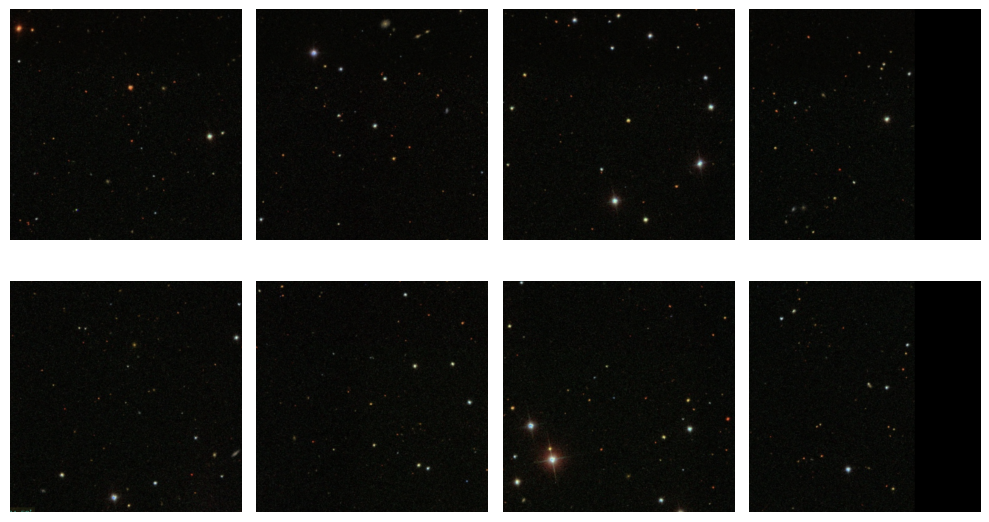

In [6]:
small_color_pieces.insert(3, small_color_pieces.pop(6))
# show all the small pieces
fig, axes = plt.subplots(2, 4, figsize=(10, 6))

for i, piece in enumerate(small_color_pieces):
    row = i // 4
    col = i % 4
    axes[row, col].imshow(piece)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

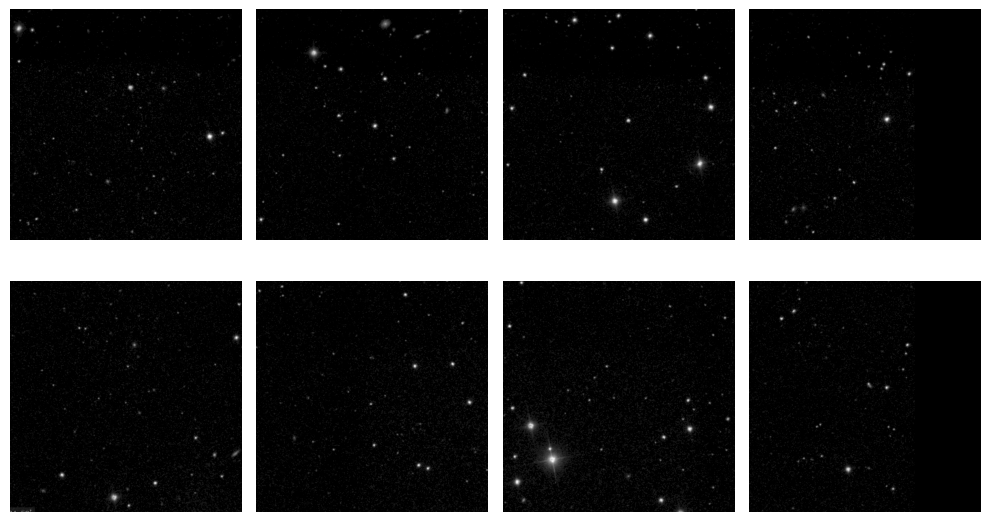

In [7]:
small_pieces.insert(3, small_pieces.pop(6))
# show all the small pieces
fig, axes = plt.subplots(2, 4, figsize=(10, 6))

for i, piece in enumerate(small_pieces):
    row = i // 4
    col = i % 4
    axes[row, col].imshow(piece, cmap='gray')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [8]:
import cv2

# Resize and save the small pieces
for i, small_color in enumerate(small_color_pieces):
    resized_piece = cv2.resize(small_color, (1024, 1024))
    resized_piece = cv2.cvtColor(resized_piece, cv2.COLOR_RGB2BGR)
    cv2.imwrite(f"small_pieces/{i}.png", resized_piece)

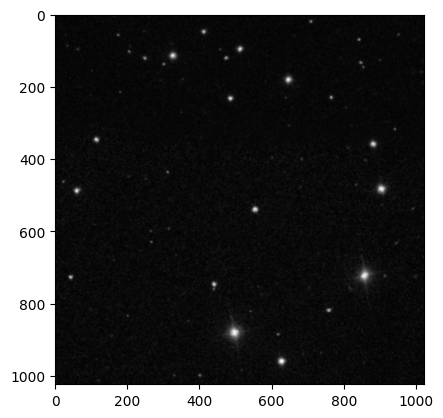

In [9]:
stellars = cv2.imread('equal_stellar_620.png', 0)
# M87_rotated = cv2.rotate(M87, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(stellars, cmap='gray')

In [10]:
%cd ../yolov5

d:\Github\DeepShadow\yolov5


In [11]:
best = r'..\logs_yolo_stellar\yolov5-2024-07-14_14-29-54\runs\train\results_1\weights\best.pt'
for small_piece in small_pieces:
    BH_stars_img(small_piece, best)
!python detect.py --weights {best} --source ../model_testing/small_pieces --img-size 1024 --conf 0.85 --save-txt --save-conf


requirements: Ultralytics requirements ['pillow>=10.3.0', 'requests>=2.32.0'] not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)


detect: weights=['..\\logs_yolo_stellar\\yolov5-2024-07-14_14-29-54\\runs\\train\\results_1\\weights\\best.pt'], source=../model_testing/small_pieces, data=data\coco128.yaml, imgsz=[1024, 1024], conf_thres=0.85, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-360-g5553d19a Python-3.9.19 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 D:\Github\DeepShadow\model_testing\small_pieces\0.png: 1024x1024 49 stellars, 16.6ms
image 2/8 D:\Github\DeepShadow\model_testing\small_pieces\1.png: 1024x1024 32 stellars, 15.1ms
image 3/8 D:\Github\DeepShadow\model_testing\